In [11]:
import os
import pandas as pd
import dask.dataframe as dd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

from data_import import *

##### test cells

In [17]:
os.listdir(data_dir)

NameError: name 'data_dir' is not defined

In [ ]:
[not(i.endswith('.csv')) for i in os.listdir(data_dir)]

[False, True, True, True]

##### Data Imports

In [2]:
data_importing = OregonImport()
data_dict = data_importing.oregon_data_runner()

table management: 100%|██████████| 3/3 [00:24<00:00,  8.04s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


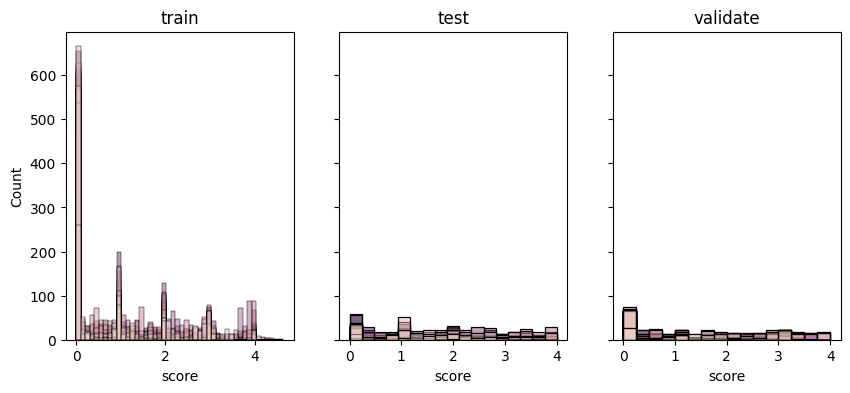

In [31]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(10,4))
sns.histplot(data=data_dict['train_timeseries'],x='score', hue = "fips", ax=ax[0])
sns.histplot(data=data_dict['test_timeseries'],x='score', hue = "fips", ax=ax[1])
sns.histplot(data=data_dict['validation_timeseries'],x='score', hue = "fips", ax=ax[2])
for axis in ax:
    axis.legend().remove()
ax[0].set_title('train')
ax[1].set_title('test')
ax[2].set_title('validate')
plt.show()

In [12]:
data_dict['train_timeseries']

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
445869,41001,2000-01-01,1.69,85.30,2.73,-5.72,-6.46,-6.45,-2.15,-7.78,5.63,-6.84,2.09,2.87,1.24,1.63,3.62,5.60,2.03,3.57,NaN
445870,41001,2000-01-02,3.82,85.63,2.50,-6.29,-7.42,-7.40,-2.85,-8.82,5.98,-7.37,2.56,4.01,1.86,2.15,4.42,5.88,3.16,2.72,NaN
445871,41001,2000-01-03,5.89,86.65,2.54,-6.21,-7.20,-7.19,-2.64,-9.10,6.47,-7.18,1.99,2.82,0.44,2.38,3.02,4.23,0.75,3.48,NaN
445872,41001,2000-01-04,7.12,86.19,3.24,-3.61,-4.29,-4.28,0.23,-6.38,6.61,-4.14,3.26,4.57,2.02,2.55,5.43,7.52,2.98,4.54,0.0
445873,41001,2000-01-05,0.88,86.81,2.65,-5.81,-6.65,-6.64,-1.44,-10.00,8.56,-8.30,2.50,3.80,0.77,3.03,4.02,5.78,1.11,4.67,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100329,41071,2016-12-27,15.42,99.59,4.99,4.09,3.67,3.65,5.59,1.98,3.60,3.93,3.18,5.96,1.72,4.24,5.83,9.48,3.86,5.61,0.0
100330,41071,2016-12-28,0.74,100.37,4.06,1.88,0.84,0.85,5.33,-0.18,5.51,0.88,1.84,2.14,1.30,0.84,3.21,4.40,1.96,2.44,NaN
100331,41071,2016-12-29,1.62,99.82,4.30,2.21,1.44,1.44,5.46,-1.10,6.56,1.98,1.98,2.41,1.14,1.28,3.64,4.62,2.78,1.84,NaN
100332,41071,2016-12-30,0.78,99.97,4.29,2.18,1.57,1.57,5.23,-0.72,5.96,1.75,1.94,2.77,1.32,1.44,3.42,4.66,2.43,2.24,NaN


In [33]:
test = data_dict['train_timeseries'].copy()
wacounty = test[test['fips']==41067]

In [39]:
wacounty.loc[:,'date'] = pd.to_datetime(wacounty['date'])

In [44]:
numeric_list = ['fips', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE', 'score']

for column_name in numeric_list:
    wacounty.loc[:,column_name] = pd.to_numeric(wacounty.loc[:,column_name])

TypeError: Invalid object type at position 6210

In [48]:
wacounty.iloc[6208]

fips                         41067
date           2016-12-30 00:00:00
PRECTOT                       0.87
PS                            99.7
QV2M                          4.25
T2M                           1.83
T2MDEW                         1.4
T2MWET                         1.4
T2M_MAX                       4.55
T2M_MIN                       -1.0
T2M_RANGE                     5.55
TS                            1.72
WS10M                         1.77
WS10M_MAX                     2.27
WS10M_MIN                      1.4
WS10M_RANGE                   0.88
WS50M                         3.27
WS50M_MAX                     3.91
WS50M_MIN                     2.29
WS50M_RANGE                   1.62
score                          NaN
Name: 87912, dtype: object

In [43]:
date_time = wacounty.loc[:,'date']
plot_cols = ['PRECTOT', 'QV2M', 'WS10M_MAX']
plot_features = wacounty[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = wacounty[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

TypeError: no numeric data to plot